In [1]:
##import relevant python modules
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import opendatasets as od


In [2]:
dataset_url = 'https://www.kaggle.com/competitions/titanic/data?select=train.csv' 
od.download(dataset_url)


Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [3]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
##save a copy of data 
titanic_copy = titanic_df.copy()

In [5]:
# We could also get overall info for the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Insight:
There are 891 data rows of dataset, majority of the columns have 891 data entries or close to it. However, Cabin column has almost 700 null data rows.

In [6]:
##summary statistics of the dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
##find duplicates
titanic_df.duplicated().sum()


0

### Insight:
There are 0 duplicates data in the dataset

**Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!**

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?



**1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)**

In [8]:
titanic_gender_ratio = titanic_df.Sex.value_counts()
titanic_gender_ratio

male      577
female    314
Name: Sex, dtype: int64

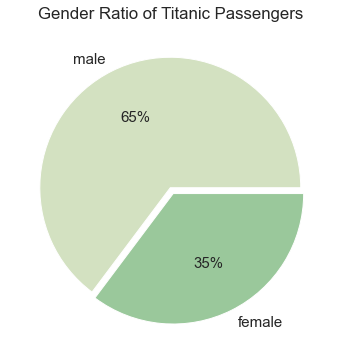

In [9]:
# Let's first check gender

##pie chart
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Gender Ratio of Titanic Passengers')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.05]

plt.pie(titanic_gender_ratio, labels=titanic_gender_ratio.index, colors = palette_color, explode=explode, autopct='%1.0f%%');



### Insight:
#### 65% of Titanic total passengers were male, whilst 35% were female. Now lets drill in further to view the ticket distribution between both sex. 

In [10]:
def embark(x):
    # Take the Age and Sex
    Pclass = x
    
    if Pclass == 1:
        return 'First Class'
    elif Pclass == 2:
        return 'Second Class'
    elif Pclass == 3:
        return 'Third Class'

# We'll define a new column called 'Embarked_from'
titanic_df['Passenger_Class'] = titanic_df['Pclass'].apply(embark)

##Drap old Embarked column and view applied changes
titanic_df.drop(columns=['Pclass'], inplace=True)
titanic_df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second Class
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First Class
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Third Class
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First Class


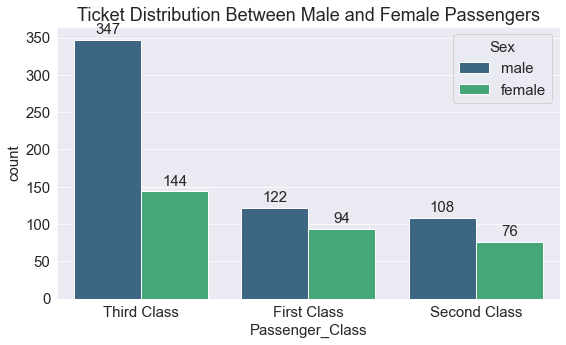

In [11]:
ax = sns.countplot(data=titanic_df, x="Passenger_Class", hue="Sex", palette='viridis')
plt.title('Ticket Distribution Between Male and Female Passengers')

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Insight:
**As expected, the men outnumbered the women in all the classes considering the gender ratio insight earlier. However, this is quite obvious in the 3rd class distribution as the men had double the third class tickets than the females, an interesting find.**

**It might be useful to know the split between males,females and children.**


In [12]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    


In [13]:

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)



In [14]:
# Let's see if this worked, check out the first ten rows
titanic_df.head(10)


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,Person
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,female
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,female
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,male
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Third Class,male
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,First Class,male
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Third Class,child
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Third Class,female
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Second Class,child


Excellent! Now we have seperated the passengers between female,male,and child. **This will be important later on beacuse of the famous "Women and children first policy"!**


In [15]:
# We could also get a quick overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

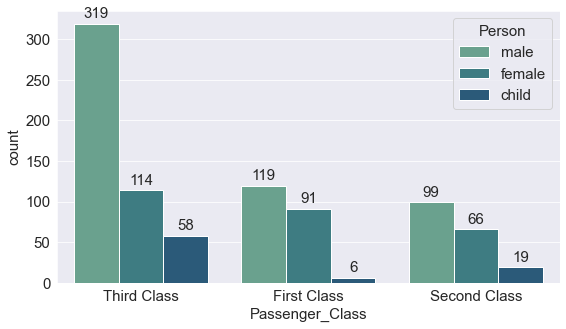

In [16]:

ax = sns.countplot(data=titanic_df, x="Passenger_Class", hue="Person", palette='crest')

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    

### Insight: 
**From the above quite, its clear that majority of the children on board the Titanic were in the Third class whilst the fewest were in the First Class with just 6 children!** 

**How about we create a distribution of the ages to get a more precise picture of the who the passengers were.**

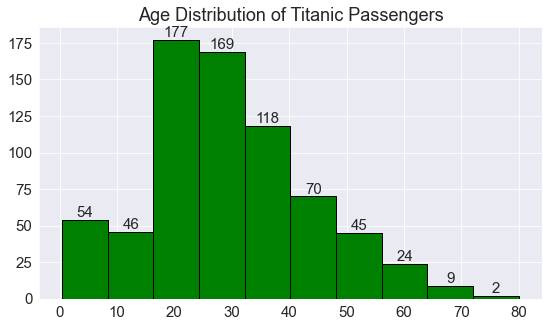

In [17]:
counts, edges, bars = plt.hist(titanic_df['Age'], bins=10, edgecolor='black', color='Green')
plt.bar_label(bars)
plt.title('Age Distribution of Titanic Passengers')
plt.rc('font', size=12);



### Insight:
**From the above, it is clear that the highest age distribution of Titanic passengers were roughly between the ages of 18 and 40. Whilst, the fewest age range is between 65 and 80**

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: 

**What deck were the passengers on and how does that relate to their class?**

In [18]:
# Let's get a quick look at our dataset again
titanic_df.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,Person
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,female
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,female
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,male


So we can see that the Cabin column has information on the deck, but as mentioned earlier, it has almost 700 NaN values, so we'll have to drop them. 

In [19]:
# First we'll drop the NaN values and create a new object, deck
deck_count = titanic_df['Cabin'].value_counts()
deck_count

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [20]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

In [21]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to extract the first letter of the cabin
for level in deck:
    levels.append(level[0])    

# Reset and Rename DataFrame
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']



In [22]:
##view top 4 of extracted cabin column
cabin_df.head(4)

,Cabin
0,C
1,C
2,E
3,G


In [23]:
##count the extracted Cabin level and sort the index for graph plotting
cabins = cabin_df.value_counts().sort_index().reset_index()
cabins

,Cabin,0
0,A,15
1,B,47
2,C,59
3,D,33
4,E,32
5,F,13
6,G,4
7,T,1


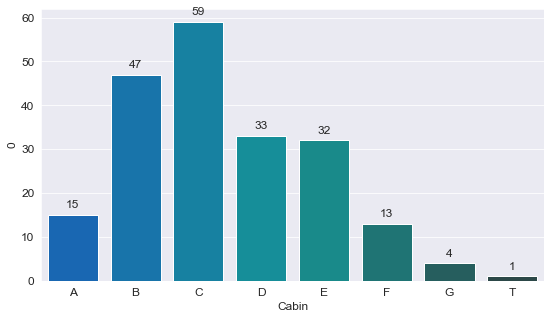

In [24]:

ax = sns.barplot( x=cabins.Cabin, y=cabins[0], data=cabins, palette='winter_d');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    


### Insights:
**From the above graph, Deck 'C' had the highest number of passenger lodges, whilst interestingly 'T' deck has just 1 passenger value which doesn't make sense, so we will drop it from the chart and replot the graph:**

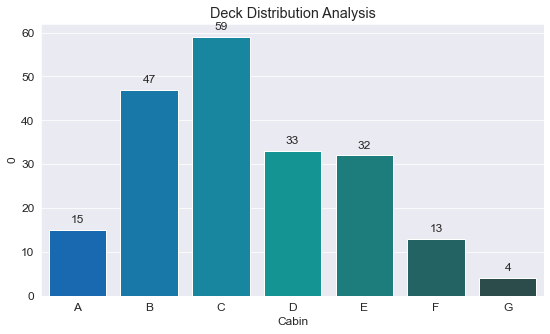

In [25]:

# Redefine cabins as it is but excluding 'T' Deck
cabins = cabins[cabins.Cabin != 'T']

#Replot the graph
plt.title('Deck Distribution Analysis')
ax = sns.barplot( x=cabins.Cabin, y=cabins[0], data=cabins, palette='winter_d');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    



Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

**3.) Where did the passengers come from?**

In [26]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,Person
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,female
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,female
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,male


**Note that the Embarked column provides details of where each passenger boarded the Titanic. The C, Q, S stands for Cherbourg, Queenstown, Southhampton.**

In [27]:
##We will now create a new column to apply the full name of the initials in the Embarked column
 
def embark(x):
    # Take the Age and Sex
    Embarked = x
    
    if Embarked == 'S':
        return 'Southhampton'
    elif Embarked == 'C':
        return 'Cherbourg'
    elif Embarked == 'Q':
        return 'Queenstown'

# We'll define a new column called 'Embarked_from'
titanic_df['Embarked_From'] = titanic_df['Embarked'].apply(embark)

##Drap old Embarked column and view applied changes
titanic_df.drop(columns=['Embarked'], inplace=True)
titanic_df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Passenger_Class,Person,Embarked_From
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Third Class,male,Southhampton
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,First Class,female,Cherbourg
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Third Class,female,Southhampton
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,First Class,female,Southhampton
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Third Class,male,Southhampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Second Class,male,Southhampton
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,First Class,female,Southhampton
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Third Class,female,Southhampton
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,First Class,male,Cherbourg


/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


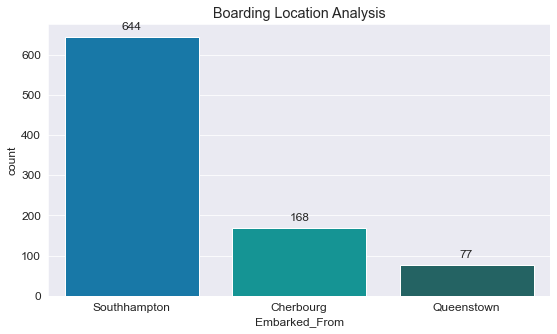

In [28]:
# Now we can plot the Graph

plt.title('Boarding Location Analysis')
ax = sns.countplot('Embarked_From', data=titanic_df, palette='winter_d');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


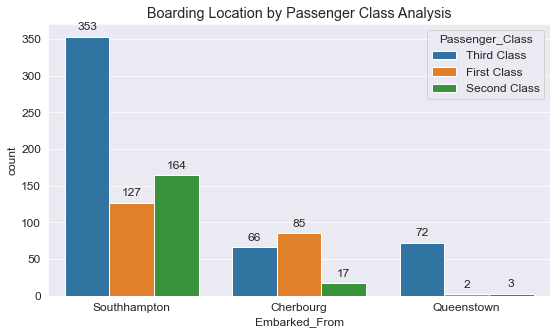

In [29]:
# Now lets drill in further by passenger class

plt.title('Boarding Location by Passenger Class Analysis')
ax = sns.countplot('Embarked_From', data=titanic_df, hue='Passenger_Class');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
 

### Insight: 
**From the above, it is clear that majority of the passengers boarded from Southhampton with over 600 passengers boarding from that location. Southhampton also had the highest boarding for all the classes. Whilst, Queenstown had the lowest number of passenger boarding from the location with just 2 and 3 First class and Second class tickets respectively. Thus, almost all the passengers boarding from Queenstown had a Third Class ticket.**

Now let's take a look at the 4th question:

**4.) Who was alone and who was with family?**

In [30]:
# Let's start by adding a new column to define alone

# We will add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is above 0, then the passenger had family aboard and was not alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [31]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


/var/folders/wv/45z6jm6d1ndbt4vr7ylqjg2c0000gn/T/ipykernel_91783/2185057729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [32]:
# Let's check to make sure it worked
titanic_df.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Passenger_Class,Person,Embarked_From,Alone
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Third Class,male,Southhampton,With Family
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,First Class,female,Cherbourg,With Family
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Third Class,female,Southhampton,Alone
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,First Class,female,Southhampton,With Family
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Third Class,male,Southhampton,Alone


In [33]:
Family_Status = titanic_df['Alone'].value_counts().reset_index().rename(columns={'index':'Family_Status', 'Alone':'Count'})
Family_Status


,Family_Status,Count
0,Alone,537
1,With Family,354


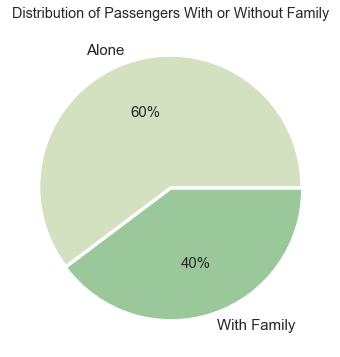

In [34]:

##pie chart
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Distribution of Passengers With or Without Family')
plt.rc('font', size=15)
palette_color = sns.cubehelix_palette(start=.2, rot=-.60, as_cmap=0) 
explode = [0, 0.02]

plt.pie(Family_Status.Count, labels=Family_Status.Family_Status, colors = palette_color, explode=explode, autopct='%1.0f%%');



### Insight:
**From the above it is clear that 60% of titanic passengers were alone during the fatal journey.**

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: : 

**What factors helped someone survive the sinking?**

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


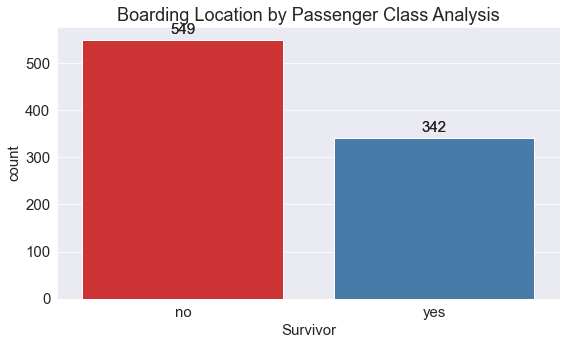

In [35]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
plt.title('Boarding Location by Passenger Class Analysis')
ax =sns.countplot('Survivor',data=titanic_df,palette='Set1');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
 

### Insight: 
**More people died than those who survived in the Titanic crash.**

Now let's see if the Passengers class on the ship had an effect on their survival rate, since the movie Titanic popularized the notion that the Third Class passengers did not do as well as their First and Second class counterparts.

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passenger_Class', ylabel='Survived'>

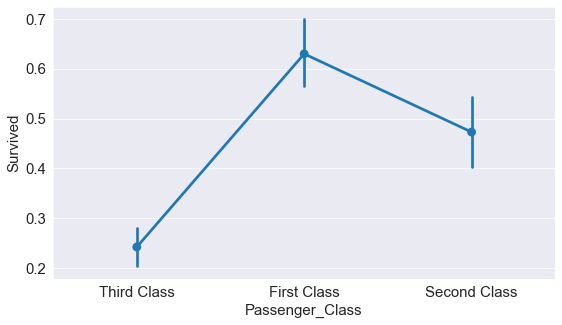

In [36]:
# Let's use a factor plot again, but now considering class
sns.pointplot('Passenger_Class','Survived', data=titanic_df)


### Insight:
**It appears that the choice of Passengers ticket class greatly increased their chances of surviving the accident. The survival rate of those in the First Class is twice over those with Third Class tickets. As can be seen the survival rate reduces as you move down the class.However, this effect may have been caused by the large amount of men in the 3rd class in combination with the women and children first policy.**

To verify this assumption, let's use 'hue' to get a clearer picture on this.

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passenger_Class', ylabel='Survived'>

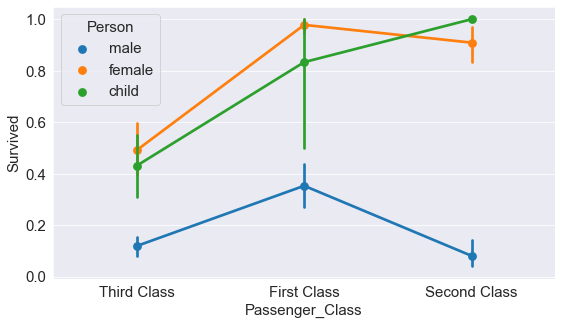

In [37]:
# Let's use a factor plot again, but now considering class and gender
sns.pointplot('Passenger_Class','Survived',hue='Person',data=titanic_df)


### Insight:
**From this data, it appears that being male or being with a Third class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival. The chances of survival as either a Females or Child was significantly higher and better, irresspective of class**

But what about age? Did being younger or older have an effect on survival rate?

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


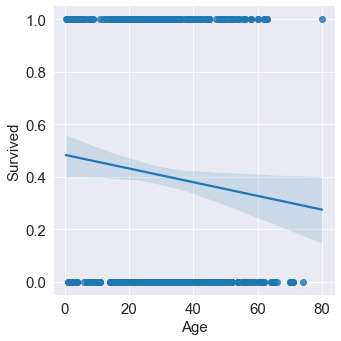

In [38]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df);


### Insight:
**It appears that there is a general trend that the older the passenger was, the less likely their chances of surviving the crash.**

Let's go ahead and use hue to take a look at the effect of class and age.

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


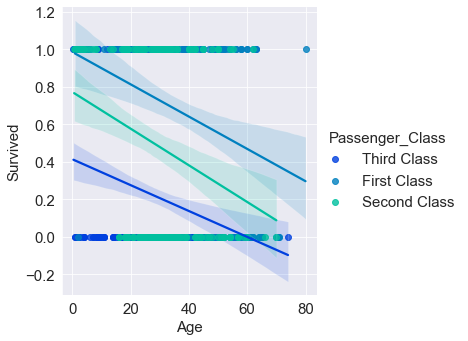

In [39]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Passenger_Class',data=titanic_df,palette='winter');


We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


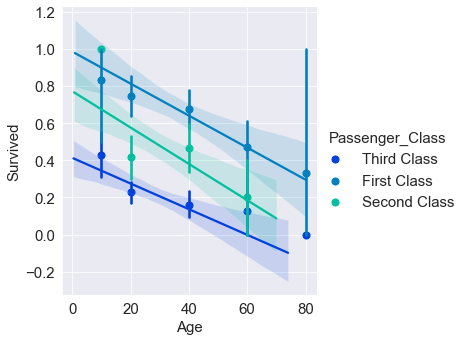

In [40]:

# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Passenger_Class',data=titanic_df,palette='winter',x_bins=generations)


### Insight:

**As earlier discovered, the younger the passenger, the higher their chances of survival. However, their choice of ticket class also greatly impacted their survival rate, First Class passenger all faired considerably better than other classes and Third class survival rate was considerably lower across all ages**

Now lets analyse the survival rate for Age based on sex, did women or men survive the crash despite their age?

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


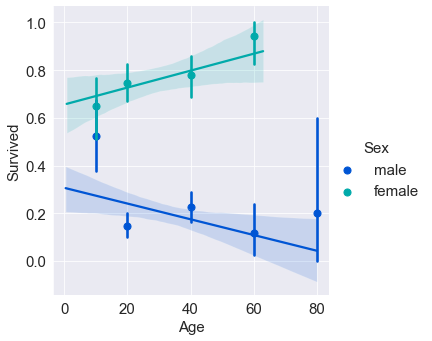

In [41]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)


### Insight
**As expected, the females survival rate is considerably higher than that of the male passenger irrespective of age.**

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now lets analysis a few factors that may have had an impact on survival rate.

1.) Did the deck have an effect on the passengers survival rate?

2.) Did having a family member increase the odds of surviving the crash?

In [42]:
titanic_df.head(3)


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Passenger_Class,Person,Embarked_From,Alone,Survivor
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Third Class,male,Southhampton,With Family,no
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,First Class,female,Cherbourg,With Family,yes
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Third Class,female,Southhampton,Alone,yes


/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


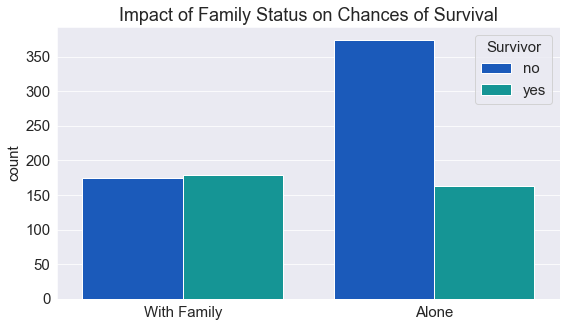

In [43]:

sns.countplot('Alone',hue='Survivor',data=titanic_df,palette='winter');
plt.xlabel(None);
plt.title('Impact of Family Status on Chances of Survival');

### Insight:
**The results survivor and non-survivors of passengers with family is balanced, which in stark comparison to passengers that travelled alone. It appears from the above that passengers that travelled the journey alone significantly did not survive the crash as compared to those that travelled with family members. Passengers travelling alone that survived the accident were also lower than Passengers with family members that survived.**

In [57]:
##extracting the first letter of the Cabin Number and creating a new column 
titanic_df['Deck_Serial']=titanic_df['Cabin'].str.extract(pat = '([ABCDEFG])')
                                                          

In [58]:
titanic_df.head(2)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Passenger_Class,Person,Embarked_From,Alone,Survivor,Deck_Serial
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Third Class,male,Southhampton,With Family,no,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,First Class,female,Cherbourg,With Family,yes,C


/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


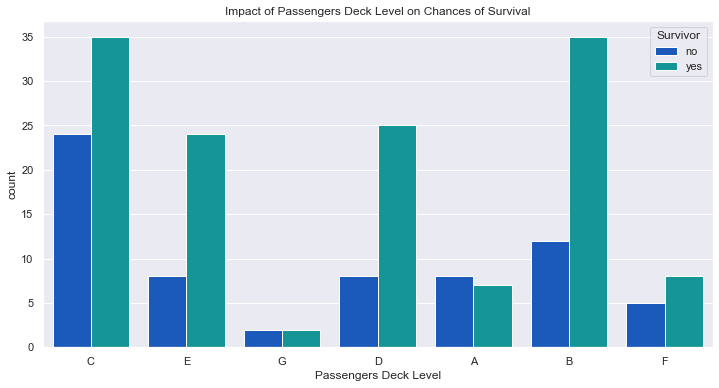

In [51]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot('Deck_Serial',hue='Survivor', data=titanic_df,palette='winter');
plt.xlabel('Passengers Deck Level');
plt.title('Impact of Passengers Deck Level on Chances of Survival');

### Insight:
**From the above graph, it is clear that majority of the passengers that survived the accident were in the B and C Deck level, followed closely by the D and E Deck level. Whilst, the G Deck had a very low survival count, although in comparison to the total number of passengers in that level, the survival rate can be said to be balanced out in comparison to other levels. The A Cabin is the only Deck level that had more passengers that died than survived the accident.**

**Now lets drill in further to view which ticket class did the passengers of this various Deck levels possess.**

/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


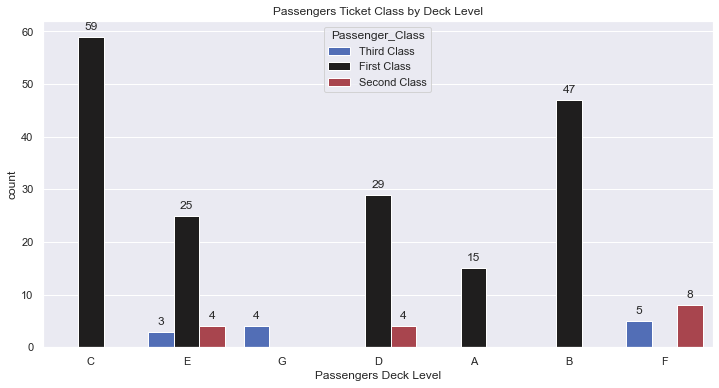

In [59]:
sns.set(rc={'figure.figsize':(12,6)})
ax= sns.countplot('Deck_Serial',hue='Passenger_Class', data=titanic_df,palette='icefire');
plt.xlabel('Passengers Deck Level');
plt.title('Passengers Ticket Class by Deck Level');

for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
 

### Insight:
**It appears from the above that all the Cabins that had the highest survival count mostly had first class ticket holders only except D and E, which had just 11 Second and Third class ticket holders. G Deck level had just Third class passengers and F Deck level had no First class ticket holders. Thus it can be assumed that Deck level had a part to play in passenger survival rate.**